
##  Insurance prediction
### Prediction of the charges of insurance based on information given by the people

Data contain information of the people and based on this how much insurance company charge to insure them.
Objective is to predict the insurance charges for the new people based on the information we will get from them. <br>
Column names : Age, Sex, BMI, Children, Smokers, Region, Charges

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/TipGreenTea/ITDS251x2-ML/main/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
343,63,1,36.765,0,0,0,13981.85035
344,49,0,41.470,4,0,2,10977.20630
345,34,0,29.260,3,0,2,6184.29940
346,33,1,35.750,2,0,2,4889.99950


### 1.2. Dimensions of Your Data
You must have a very good handle on how much data you have, both in terms of rows and columns.
  Too many rows and algorithms may take too long to train. Too few and perhaps you do not have enough data to train the algorithms.
  Too many features and some algorithms can be distracted or suffer poor performance due to the curse of dimensionality.

In [5]:
#CODE HERE
df.shape

(348, 7)

### 1.3. Data Type For Each Attribute
The type of each attribute is important. Strings may need to be converted to floating point values or integers to represent categorical or ordinal values. You can get an idea of the types of attributes by peeking at the raw data, as above. You can also list the data types used by the DataFrame to characterize each attribute using the dtypes property.

In [6]:
#CODE HERE
df.dtypes

,0
age,int64
sex,int64
bmi,float64
children,int64
smoker,int64
region,int64
charges,float64


### 1.4. Descriptive Statistics
Descriptive statistics can give you great insight into the properties of each attribute. Often you can create more summaries than you have time to review. The describe() function on the Pandas DataFrame lists 8 statistical properties of each attribute.

In [23]:
#CODE HERE
#describe
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


## 2. Understand Data With Visualization
### 2.1. Univariate Plots
In this section we will look at three techniques that you can use to understand each attribute of your dataset independently.
  Histograms.
  Density Plots.
  Box and Whisker Plots.
#### Histograms
A fast way to get an idea of the distribution of each attribute is to look at histograms. Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help you see possible outliers.

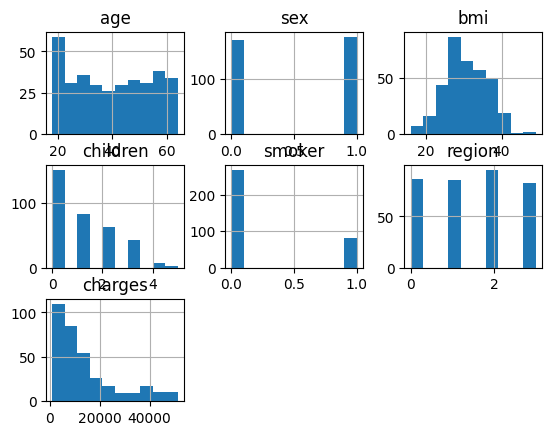

In [8]:
#CODE HERE
df.hist()
plt.show()

### 2.2. Multivariate Plots
This section provides examples of two plots that show the interactions between multiple variables in your dataset.
  Correlation Matrix Plot.   Scatter Plot Matrix.
#### Correlation Matrix Plot
Correlation gives an indication of how related the changes are between two variables. If two variables change in the same direction they are positively correlated. If they change in opposite directions together (one goes up, one goes down), then they are negatively correlated. You can calculate the correlation between each pair of attributes. This is called a correlation matrix. You can then plot the correlation matrix and get an idea of which variables have a high correlation with each other. This is useful to know, because some machine learning algorithms like linear and logistic regression can have poor performance if there are highly correlated input variables in your data.

In [12]:
#CODE HERE
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.078566,0.132440,0.028685,-0.010839,-0.055474,0.317378
sex,-0.078566,1.000000,-0.023251,-0.006161,0.146923,-0.057304,0.098134
bmi,0.132440,-0.023251,1.000000,0.069632,0.018482,0.111163,0.210051
children,0.028685,-0.006161,0.069632,1.000000,-0.002561,-0.045782,0.069593
smoker,-0.010839,0.146923,0.018482,-0.002561,1.000000,0.023023,0.798537
region,-0.055474,-0.057304,0.111163,-0.045782,0.023023,1.000000,0.001551
charges,0.317378,0.098134,0.210051,0.069593,0.798537,0.001551,1.000000


#### Scatter Plot Matrix
A scatter plot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. You can create a scatter plot for each pair of attributes in your data. Drawing all these scatter plots together is called a scatter plot matrix. Scatter plots are useful for spotting structured relationships between variables, like whether you could summarize the relationship between two variables with a line. Attributes with structured relationships may also be correlated and good candidates for removal from your dataset.

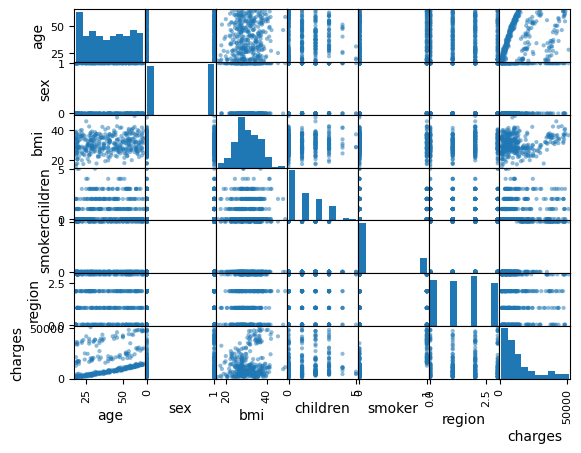

In [18]:
#CODE HERE
pd.plotting.scatter_matrix(df)
plt.show()

## 3. Prepare Your Data For Machine Learning (Regression Problem)




In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
# Defining the features and target variable
X = df.drop('charges', axis=1)
y = df['charges']

# Splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #42 --> 20% test: 8

# Creating and fitting the Linear Regression model
lin_model = LinearRegression()

# Train the model
lin_model.fit(X_train, y_train)

# Predicting values for the validation set
y_pred = lin_model.predict(X_test)

# Displaying the parameters of the linear model
coefficients = lin_model.coef_
intercept = lin_model.intercept_

# Comparing predicted values with actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

# print all these value and explain to LAs
coefficients, intercept, comparison, mae , rmse, r2

(array([  264.80734446,   -42.86029121,   367.83299045,   610.93683144,
        23227.46587524,  -292.7804862 ]),
 np.float64(-13549.26339778171),
           Actual     Predicted
 255  13047.33235  12178.034844
 114  11488.31695  13856.730174
 314  34838.87300  27499.615219
 268   7441.05300   9165.358496
 167   6128.79745   8660.104431
 ..           ...           ...
 93    5729.00530   9394.779622
 180  11735.87905  11992.106165
 183   7419.47790   7523.948550
 197   8516.82900   9523.403320
 325   6600.20595  10156.051060
 
 [70 rows x 2 columns],
 4275.854668717769,
 np.float64(6142.221997810667),
 0.7918111887183533)